# Data extraction for Prediction task in time and last version of data extraction

# Import

In [1]:
from __future__ import absolute_import
from __future__ import print_function
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler
import joblib
import os
import csv
import sys
import pandas as pd
import numpy as np
import re
import os
import shutil
import re
import random
from tqdm.notebook import tqdm  # Use tqdm for progress bar in Jupyter

eicu_path = r"Z:\eicu-collaborative-research-database-2.0"
data_processed_path = r"C:\Users\URHU\Documents\data_temp\eICU"
root_path = r"C:\Users\URHU\Documents\delirium_data"

def dataframe_from_csv(path, header=0, index_col=False):
    return pd.read_csv(path, header=header, index_col=index_col)

# Loading

In [ ]:
pats = dataframe_from_csv(os.path.join(eicu_path, 'patient.csv'),index_col=False)

In [ ]:
display(pats.head())
print(f"Unique patient IDs: {pats['patientunitstayid'].nunique()}")
#show patienthealthsystemstayid col
print(f"Unique patient health system stay IDs: {pats['patienthealthsystemstayid'].nunique()}")
# Show descriptive statistics for all columns, including those with object dtype
pd.set_option('display.max_columns', None)
display(pats.describe(include='all'))

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,0,Direct Admit,2015,03:50:00,3596,Death,Expired,Med-Surg ICU,15:54:00,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Alive,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870
2,141179,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-22,Emergency Department,2015,19:20:00,2042,Home,Alive,Med-Surg ICU,09:18:00,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,-780,Floor,2015,23:30:00,12492,Home,Alive,CTICU,07:18:00,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276
4,141196,128943,Male,71,Caucasian,67,109,NaN,162.6,20:21:00,-99,Emergency Department,2015,17:00:00,5460,Home,Alive,Med-Surg ICU,22:00:00,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665


Unique patient IDs: 200859
Unique patient health system stay IDs: 166355


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
count,2.008590e+05,2.008590e+05,200725,200764,198569,200859.000000,200859.000000,177863,196644.000000,200859,2.008590e+05,151395,200859.000000,200859,2.008590e+05,198826,199108,200859,200859,199769,200859.000000,200859,184141.000000,109922.000000,200859,200859.000000,200525,200825,200859
unique,NaN,NaN,4,91,6,NaN,NaN,392,NaN,25603,NaN,15,NaN,2119,NaN,8,2,8,1590,15,NaN,4,NaN,NaN,1522,NaN,17,2,139367
top,NaN,NaN,Male,> 89,Caucasian,NaN,NaN,"Sepsis, pulmonary",NaN,11:59:00,NaN,Emergency Department,NaN,21:00:00,NaN,Home,Alive,Med-Surg ICU,21:30:00,Emergency Department,NaN,admit,NaN,NaN,20:00:00,NaN,Floor,Alive,021-239346
freq,NaN,NaN,108379,7081,155285,NaN,NaN,8862,NaN,314,NaN,82504,NaN,1488,NaN,116816,181104,113222,284,89594,NaN,154948,NaN,NaN,660,NaN,93121,189918,26
mean,1.674016e+06,1.330683e+06,NaN,NaN,NaN,262.466317,634.919013,NaN,169.247166,NaN,-2.359470e+03,NaN,2014.524477,NaN,9.763672e+03,NaN,NaN,NaN,NaN,NaN,1.279614,NaN,83.933920,84.320292,NaN,3858.131913,NaN,NaN,NaN
std,9.995898e+05,8.156735e+05,NaN,NaN,NaN,116.302287,306.995438,NaN,13.690182,NaN,7.402804e+03,NaN,0.499402,NaN,1.493003e+04,NaN,NaN,NaN,NaN,NaN,0.655562,NaN,27.085359,34.209650,NaN,6236.445188,NaN,NaN,NaN
min,1.411680e+05,1.289190e+05,NaN,NaN,NaN,56.000000,82.000000,NaN,0.000000,NaN,-1.054551e+06,NaN,2014.000000,NaN,-8.549000e+03,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,-7687.000000,NaN,NaN,NaN
25%,8.311730e+05,6.291915e+05,NaN,NaN,NaN,167.000000,394.000000,NaN,162.500000,NaN,-1.586000e+03,NaN,2014.000000,NaN,3.322000e+03,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,66.100000,66.500000,NaN,1179.000000,NaN,NaN,NaN
50%,1.579307e+06,1.220701e+06,NaN,NaN,NaN,252.000000,622.000000,NaN,170.000000,NaN,-3.030000e+02,NaN,2015.000000,NaN,6.545000e+03,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,80.000000,80.900000,NaN,2266.000000,NaN,NaN,NaN
75%,2.695827e+06,2.163790e+06,NaN,NaN,NaN,383.000000,953.000000,NaN,177.800000,NaN,-8.600000e+01,NaN,2015.000000,NaN,1.155800e+04,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,97.000000,98.000000,NaN,4279.000000,NaN,NaN,NaN


## Some function needed (patient.csv)

In [10]:
###############################
# Non-time series preprocessing
###############################
g_map = {'Female': 1, 'Male': 2, '': 0, 'NaN': 0, 'Unknown': 0, 'Other': 0}
def transform_gender(gender_series):
    global g_map
    return {'gender': gender_series.fillna('').apply(lambda s: g_map[s] if s in g_map else g_map[''])}
e_map = {'Asian': 1, 'African American': 2, 'Caucasian': 3, 'Hispanic': 4, 'Native American': 5, 'NaN': 0, '': 0}
def transform_ethnicity(ethnicity_series):
    global e_map
    return {'ethnicity': ethnicity_series.fillna('').apply(lambda s: e_map[s] if s in e_map else e_map[''])}
h_s_map = {'Expired': 0, 'Alive': 1, '': 2, 'NaN': 2}
def transform_hospital_discharge_status(status_series):
    global h_s_map
    return {'hospitaldischargestatus': status_series.fillna('').apply(
        lambda s: h_s_map[s] if s in h_s_map else h_s_map[''])}
def transform_unit_discharge_status(status_series):
    global h_s_map
    return {'unitdischargestatus': status_series.fillna('').apply(
        lambda s: h_s_map[s] if s in h_s_map else h_s_map[''])}
def transform_dx_into_id(df):
    dx_type = df.apacheadmissiondx.unique()
    dict_dx_key = pd.factorize(dx_type)[1]
    dict_dx_val = pd.factorize(dx_type)[0]
    dictionary = dict(zip(dict_dx_key, dict_dx_val))
    df['apacheadmissiondx'] = df['apacheadmissiondx'].map(dictionary)
    return df

def read_patients_table(eicu_path, root_path):
    pats = dataframe_from_csv(os.path.join(eicu_path, 'patient.csv'),index_col=False)
    pats = filter_patients_on_age(pats, min_age=18, max_age=89)
    pats = filter_patients_on_columns(pats)
    pats.update(transform_gender(pats.gender))
    pats.update(transform_ethnicity(pats.ethnicity))
    pats.update(transform_hospital_discharge_status(pats.hospitaldischargestatus))
    pats.update(transform_unit_discharge_status(pats.unitdischargestatus))
    pats = transform_dx_into_id(pats)
    pats.to_csv(os.path.join(root_path, 'all_stays.csv'), index=False)
    pats = filter_patients_on_columns_model(pats)
    return pats

def filter_patients_on_age(patient, min_age=18, max_age=89):
    patient.loc[patient['age'] == '> 89','age'] = 90
    patient[['age']] = patient[['age']].fillna(-1)
    patient[['age']] = patient[['age']].astype(int)
    patient = patient.loc[(patient.age >= min_age) & (patient.age <= max_age)]
    return patient

def filter_patients_on_columns(patients):
    columns = ['patientunitstayid','gender', 'age', 'ethnicity','apacheadmissiondx',
        # 'hospitaladmityear',  
        'hospitaldischargeyear','hospitaldischargeoffset','uniquepid',        
        'admissionheight','hospitaladmitoffset', 'admissionweight',
        'hospitaldischargestatus','unitdischargeoffset', 'unitdischargestatus']
    return patients[columns]
def filter_patients_on_columns_model(patients):
    columns = ['patientunitstayid','gender', 'age', 'ethnicity','apacheadmissiondx','uniquepid',
         'admissionheight','hospitaladmitoffset','admissionweight',
         'hospitaldischargestatus','unitdischargeoffset','unitdischargestatus']
    return patients[columns]

## Patient.csv

In [ ]:
from __future__ import absolute_import
from __future__ import print_function
import os
patients = read_patients_table(eicu_path,root_path)
patient_cohort = patients["patientunitstayid"].unique()

In [ ]:
print(f"Number of unique patients in: {patients['patientunitstayid'].nunique()}")
patients.head()

Number of unique patients in: 193153


,patientunitstayid,gender,age,ethnicity,apacheadmissiondx,uniquepid,admissionheight,hospitaladmitoffset,admissionweight,hospitaldischargestatus,unitdischargeoffset,unitdischargestatus
0,141168,1,70,3,0.0,002-34851,152.4,0,84.3,0,3596,0
1,141178,1,52,3,NaN,002-33870,162.6,-14,54.4,1,8,1
2,141179,1,52,3,NaN,002-33870,162.6,-22,NaN,1,2042,1
3,141194,2,68,3,-1.0,002-5276,180.3,-780,73.9,1,4813,1
4,141196,2,71,3,NaN,002-37665,162.6,-99,NaN,1,1463,1


In [ ]:
patients.shape

(193153, 12)

In [ ]:
patients.groupby(['uniquepid']).head(1).shape

(133409, 12)

In [ ]:
139367 - 133409

5958

# Nurse Charting

In [ ]:
import pandas as pd
import os

chunk_size = 50000
drop_cols = []  # Add any columns you want to drop
output_file = os.path.join(data_processed_path, 'nc.csv')
first = True

for chunk in pd.read_csv(os.path.join(eicu_path, 'nurseCharting.csv'), chunksize=chunk_size, low_memory=False):
    chunk = chunk.drop(columns=[col for col in drop_cols if col in chunk.columns], errors='ignore')
    chunk = chunk[chunk['patientunitstayid'].notnull()]
    chunk['patientunitstayid'] = chunk['patientunitstayid'].astype(int)
    # Write chunk to CSV
    chunk.to_csv(output_file, mode='a', header=first, index=False)
    first = False

In [ ]:
df = pd.read_csv(os.path.join(data_processed_path, 'nc.csv'))

In [ ]:
print(f"Shape of the DataFrame: {df.shape}")
ds = df[df['nursingchartcelltypevalname']=="Delirium Score"].patientunitstayid.unique()
cam = df[df['nursingchartvalue']=="CAM-ICU"].patientunitstayid.unique()
cam_cohort = set(ds).intersection(set(cam))
cam_cohort = np.array(list(cam_cohort.intersection(set(patient_cohort))))
cam_cohort = np.array(cam_cohort)
cam_cohort = cam_cohort.astype(int)


Shape of the DataFrame: (152104233, 8)


In [ ]:
df.patientunitstayid.nunique(), cam_cohort.shape[0]

(194144, 24628)

In [ ]:
nc = df[df['patientunitstayid'].isin(cam_cohort)]

In [ ]:
nc.to_csv(os.path.join(data_processed_path, 'nc.csv'),index=False)

In [ ]:
def filter_nc_on_columns(nc):
    columns =['patientunitstayid','nursingchartoffset','nursingchartcelltypevallabel',
              'nursingchartcelltypevalname','nursingchartvalue']
    return nc[columns]
def rename_nc_columns(nc):
    nc.rename(index=str, columns={"nursingchartoffset": "itemoffset",
                                  "nursingchartcelltypevalname":"itemname",
                                  "nursingchartcelltypevallabel" : "itemlabel",
                                  "nursingchartvalue": "itemvalue"}, inplace=True)
    return nc
def item_name_selected_from_nc(nc,label,name):
    nc = nc[(nc.itemname.isin(name)) & (nc.itemlabel.isin(label))]
    return nc
def unify_itemname_nc(nc):  #SYNC
    nc.loc[nc['itemname']=='Value','itemname'] = nc.itemlabel
    nc.loc[nc['itemname']=='Non-Invasive BP Systolic','itemname'] = 'BP Systolic'
    nc.loc[nc['itemname']=='Non-Invasive BP Diastolic','itemname'] = 'BP Diastolic'
    nc.loc[nc['itemname']=='Invasive BP Systolic','itemname'] = 'BP Systolic'
    nc.loc[nc['itemname']=='Invasive BP Diastolic','itemname'] = 'BP Diastolic'
    nc.loc[nc['itemlabel']=='Arterial Line MAP (mmHg)','itemname'] = 'MAP (mmHg)'
    nc.loc[nc['itemlabel']=='Invasive BP Mean','itemname'] = 'MAP (mmHg)'
    nc.loc[nc['itemlabel']=='Non-Invasive BP Mean','itemname'] = 'MAP (mmHg)'
    nc.loc[nc['itemlabel']=='SpO2','itemname'] = 'O2 Saturation'
    nc.loc[nc['itemlabel']=='Bedside Glucose','itemname'] = 'glucose'
    return nc

In [ ]:
def read_nc_table(data_processed_path):    #SYNC
    nc = dataframe_from_csv(os.path.join(data_processed_path, 'nc.csv'),index_col=False)
    nc = filter_nc_on_columns(nc)
    nc = rename_nc_columns(nc)
    vitals = [['O2 Saturation' ,'O2 Saturation'],
        ['SpO2', 'Value'],
        ['Heart Rate' ,'Heart Rate'],
        ['Temperature' ,'Temperature (C)'],
        ['Bedside Glucose' ,'Bedside Glucose'],
        ['Delirium Scale/Score' ,'Delirium Score'],
        ['Glasgow coma score' ,'Verbal'],
        ['Glasgow coma score' ,'GCS Total'],
        ['Glasgow coma score' ,'Eyes'],
        ['Glasgow coma score' ,'Motor'],
        ['Glasgow coma score' ,'Verbal'],
        ['Non-Invasive BP' ,'Non-Invasive BP Systolic'],
        ['Non-Invasive BP' ,'Non-Invasive BP Diastolic'],
        ['Invasive BP' ,'Invasive BP Systolic'],
        ['Invasive BP' ,'Invasive BP Diastolic'],
        ['MAP (mmHg)' ,'Value'],
        ['Sedation Scale/Score/Goal','Sedation Score'],
        ['ICP', 'ICP'],
        ['CI','CI'],
        ['Respiratory Rate','Respiratory Rate']] 

    label , name = [],[]
    for v in vitals:
        label.append(v[0])
        name.append(v[1])
    nc = item_name_selected_from_nc(nc,label,name)
    nc = unify_itemname_nc(nc)
    del nc['itemlabel']
    return nc


In [ ]:
nc = read_nc_table(data_processed_path)

In [ ]:
nc_items = nc.itemname.unique()

In [ ]:
print(f"Number of unique items in nurse charting: {len(nc_items)}")
#show items
print("Items in nurse charting:")
for item in nc_items:   
    print(item) 

Number of unique items in nurse charting: 16
Items in nurse charting:
Heart Rate
BP Diastolic
Respiratory Rate
O2 Saturation
BP Systolic
Delirium Score
Motor
Verbal
Eyes
GCS Total
Temperature (C)
Sedation Score
glucose
ICP
CI
MAP (mmHg)


In [ ]:
# break up stays by unit stay
#purpose: to break up the nurse charting data by unit stay ID and save each unit stay's data into a separate folder
#each folder will be named after the unit stay ID and will contain a CSV file with the nurse charting data for that unit stay
def break_up_stays_by_unit_stay_nc(nursecharting, root_path, stayid=None, verbose=1):
    unit_stays = nursecharting.patientunitstayid.unique() if stayid is None else stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(root_path, str(stay_id))
        try:
            os.makedirs(dn)
        except:
            pass
        nursecharting.loc[nursecharting.patientunitstayid == stay_id].sort_values(by='itemoffset').to_csv(os.path.join(dn, 'nc.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [ ]:
len(cam_cohort)

24628

In [ ]:
break_up_stays_by_unit_stay_nc(nc,data_processed_path,stayid=cam_cohort, verbose=1)

StayID 24628 of 24628...DONE!


# Patients 

In [ ]:
def break_up_stays_by_unit_stay(pats, root_path, stayid=None, verbose=1):
    unit_stays = pats.patientunitstayid.unique() if stayid is None else stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(root_path, str(stay_id))
        try:
            os.makedirs(dn)
        except:
            pass
        pat = pats.loc[pats["patientunitstayid"] == stay_id]
        pat.to_csv(os.path.join(dn, 'pat.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [ ]:
patients.shape

(193153, 12)

In [ ]:
break_up_stays_by_unit_stay(patients, data_processed_path,stayid=cam_cohort, verbose=1)

StayID 24628 of 24628...DONE!


# similiar Lab items, NC items and InfDrg items need to be unified 

### Lab Functions


In [ ]:
lab = dataframe_from_csv(os.path.join(eicu_path, 'lab.csv'),index_col=False)

In [ ]:
lab.head()
#shape
print(f"Shape of the lab DataFrame: {lab.shape}")

Shape of the lab DataFrame: (39132531, 10)


In [3]:
def filter_lab_on_columns(lab):
    columns = ['patientunitstayid','labresultoffset', 'labname', 'labresult']
    return lab[columns]

def rename_lab_columns(lab):
    lab.rename(index=str, columns={"labresultoffset": "itemoffset",
                                   "labname": "itemname", "labresult": "itemvalue"}, inplace=True)
    return lab

def item_name_selected_from_lab(lab,items):
    lab= lab[lab['itemname'].isin(items)]
    return lab

def check(x):
    try:
        x = float(str(x).strip())
    except:
        x = np.nan
    return x

def check_itemvalue(df):
    df['itemvalue'] = df['itemvalue'].apply(lambda x: check(x))
    df['itemvalue'] = df['itemvalue'].astype(float)
    return df

def read_lab_table(eicu_path):
    lab = dataframe_from_csv(os.path.join(eicu_path, 'lab.csv'),index_col=False)
    
    items = ['O2 Sat (%)','WBC x 1000','sodium','BUN',
             'bedside glucose','glucose', 
             'direct bilirubin',
             'Hgb','platelets x 1000','potassium','chloride','bicarbonate',
             'creatinine','ALT (SGPT)','AST (SGOT)','alkaline phos.',
             'lactate','pH','ammonia','cortisol','TSH','serum osmolality']

    lab = filter_lab_on_columns(lab)  
    lab = rename_lab_columns(lab)
    lab = item_name_selected_from_lab(lab,items) 
    lab.loc[lab['itemname'] == 'bedside glucose', 'itemname'] = 'glucose'  
    lab.loc[lab['itemname'] == 'O2 Sat (%)', 'itemname'] = 'O2 Saturation'
    lab = check_itemvalue(lab)
    return lab

In [ ]:
lab = read_lab_table(eicu_path) 

In [ ]:
def break_up_lab_by_unit_stay(lab, root_path, stayid=None, verbose=1):
    unit_stays = lab.patientunitstayid.unique() if stayid is None else stayid
    nb_unit_stays = unit_stays.shape[0]
    for i, stay_id in enumerate(unit_stays):
        if verbose:
            sys.stdout.write('\rStayID {0} of {1}...'.format(i+1, nb_unit_stays))
        dn = os.path.join(root_path, str(stay_id))
        try:
            os.makedirs(dn)
        except:
            pass
        lab.loc[lab.patientunitstayid == stay_id].sort_values(by='itemoffset').to_csv(os.path.join(dn, 'lab.csv'), index=False)
    if verbose:
        sys.stdout.write('DONE!\n')

In [ ]:
lab.shape

(18446928, 4)

In [ ]:
lab_items = lab.itemname.unique()

In [ ]:
break_up_lab_by_unit_stay(lab,data_processed_path,stayid = cam_cohort, verbose = 1)

StayID 24628 of 24628...DONE!


## chekpoint

In [ ]:
#save lab_items
with open(os.path.join(data_processed_path, 'lab_items.txt'), 'w') as f:
    for item in lab_items:
        f.write(f"{item}\n")
#save nc_items
with open(os.path.join(data_processed_path, 'nc_items.txt'), 'w') as f:
    for item in nc_items:
        f.write(f"{item}\n")

### Read each patient nc, lab and demographics and put all in one csv file named as time_series{ID}.csv

In [ ]:
def convert_events_to_timeseries(events, variable_column='itemname', variables=[]):
    metadata = events[['itemoffset', 'patientunitstayid']].sort_values(by=['itemoffset', 'patientunitstayid'])\
                    .drop_duplicates(keep='first').set_index('itemoffset')
    timeseries = events[['itemoffset', variable_column, 'itemvalue']]\
                    .sort_values(by=['itemoffset', variable_column, 'itemvalue'], axis=0)\
                    .drop_duplicates(subset=['itemoffset', variable_column], keep='last')
    timeseries = timeseries.pivot(index='itemoffset', columns=variable_column, values='itemvalue').merge(metadata, left_index=True, right_index=True)\
                    .sort_index(axis=0).reset_index()
    for v in variables:
        if v not in timeseries:
            timeseries[v] = np.nan
    return timeseries

In [ ]:
lab_items

array(['pH', 'BUN', 'lactate', 'chloride', 'platelets x 1000',
       'alkaline phos.', 'WBC x 1000', 'creatinine', 'Hgb', 'bicarbonate',
       'potassium', 'ALT (SGPT)', 'AST (SGOT)', 'glucose', 'sodium',
       'direct bilirubin', 'ammonia', 'TSH', 'O2 Saturation',
       'serum osmolality', 'cortisol'], dtype=object)

In [ ]:
nc_items

array(['Heart Rate', 'BP Diastolic', 'Respiratory Rate', 'O2 Saturation',
       'BP Systolic', 'Delirium Score', 'Motor', 'Verbal', 'Eyes',
       'GCS Total', 'Temperature (C)', 'Sedation Score', 'glucose', 'ICP',
       'CI', 'MAP (mmHg)'], dtype=object)

In [ ]:
len(lab_items), len(nc_items)

(21, 16)

In [ ]:
var_to_consider = list(lab_items) + list(nc_items)

In [ ]:
len(var_to_consider)

37

In [ ]:
var_to_consider

['pH',
 'BUN',
 'lactate',
 'chloride',
 'platelets x 1000',
 'alkaline phos.',
 'WBC x 1000',
 'creatinine',
 'Hgb',
 'bicarbonate',
 'potassium',
 'ALT (SGPT)',
 'AST (SGOT)',
 'glucose',
 'sodium',
 'direct bilirubin',
 'ammonia',
 'TSH',
 'O2 Saturation',
 'serum osmolality',
 'cortisol',
 'Heart Rate',
 'BP Diastolic',
 'Respiratory Rate',
 'O2 Saturation',
 'BP Systolic',
 'Delirium Score',
 'Motor',
 'Verbal',
 'Eyes',
 'GCS Total',
 'Temperature (C)',
 'Sedation Score',
 'glucose',
 'ICP',
 'CI',
 'MAP (mmHg)']

# Binning

In [ ]:
def binning(df, x=60):
    df['itemoffset'] = (df['itemoffset']/x).astype(int)
    # Only fill numeric columns with their mean
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df.groupby('itemoffset')[numeric_cols].transform(lambda x: x.fillna(x.mean()))
    df.drop_duplicates(subset=['itemoffset'], keep='last', inplace=True)
    return df

# Extract Time series

In [ ]:
import re
import random
from tqdm import tqdm  # Use tqdm for progress bar in Jupyter
tqdm.pandas()

def normalize_exception_msg(msg):
    msg = re.sub(r"\d+", "[number]", msg)
    msg = re.sub(r"\[[^\]]+\]", "[id]", msg)
    msg = re.sub(r"'[^']+'", "'[value]'", msg)
    return msg

def extract_time_series_from_subject_sampled(t_path, sample_size=None):
    stay_dirs = [d for d in os.listdir(t_path) if os.path.isdir(os.path.join(t_path, d))]
    if sample_size is not None:
        sampled_stays = random.sample(stay_dirs, min(sample_size, len(stay_dirs)))
    else:
        sampled_stays = stay_dirs
    exception_counts = {}
    for stay_dir in tqdm(sampled_stays, desc="Processing stays", ascii=" ▖▘▝▗▚▞█" ):
        dn = os.path.join(t_path, stay_dir)
        try:
            stay_id = int(stay_dir)
        except Exception as e:
            msg = f"ID parse: {type(e).__name__}: {e}"
            norm_msg = normalize_exception_msg(msg)
            exception_counts[norm_msg] = exception_counts.get(norm_msg, 0) + 1
            continue
        try:
            pat_path = os.path.join(t_path, stay_dir, 'pat.csv')
            lab_path = os.path.join(t_path, stay_dir, 'lab.csv')
            nc_path = os.path.join(t_path, stay_dir, 'nc.csv')
            pat = dataframe_from_csv(pat_path)
            lab = dataframe_from_csv(lab_path)
            nc = dataframe_from_csv(nc_path)
            dfs_to_concat = [df for df in [nc, lab] if not df.empty]
            if len(dfs_to_concat) == 0:
                continue
            nclab = pd.concat(dfs_to_concat).sort_values(by=['itemoffset'])
            timeepisode = convert_events_to_timeseries(nclab, variables=var_to_consider)
            nclabpat = pd.merge(timeepisode, pat, on='patientunitstayid')
            df = binning(nclabpat, 60)
            df.to_csv(os.path.join(t_path, stay_dir, 'timeseries.csv'), index=False)
        except Exception as e:
            print(f"Error in stay {stay_id}: {e}")
            msg = f"Process: {type(e).__name__}: {e}"
            norm_msg = normalize_exception_msg(msg)
            exception_counts[norm_msg] = exception_counts.get(norm_msg, 0) + 1
            continue
    print("Sampled Exception summary:")
    for msg, count in exception_counts.items():
        print(f"{msg} - {count} times")

In [ ]:
extract_time_series_from_subject_sampled(data_processed_path)

Processing stays:  98%|█████████▚| 24098/24628 [2:30:34<01:55,  4.60it/s]   

Error in stay 977225: [Errno 13] Permission denied: 'C:\\Users\\URHU\\Documents\\data_temp\\eICU\\977225\\timeseries.csv'


Processing stays: 100%|██████████| 24628/24628 [2:34:06<00:00,  2.66it/s]

Sampled Exception summary:
Process: PermissionError: [id]] Permission denied: '[value]' - 1 times


### Delete folders without timeseries file

In [ ]:
import shutil
def delete_wo_timeseries(t_path):
    for stay_dir in os.listdir(t_path):
        dn = os.path.join(t_path, stay_dir)
        try:
            stay_id = int(stay_dir)
            if not os.path.isdir(dn):
                raise Exception
        except:
            continue
        try:
            sys.stdout.flush()
            if not os.path.isfile(os.path.join(dn,'timeseries.csv')):
                shutil.rmtree(dn)   
        except :
            continue
    print('DONE')


In [ ]:
#before deleting show the number of directories without timeseries.csv
def count_directories_without_timeseries(t_path):
    count = 0
    for stay_dir in os.listdir(t_path):
        dn = os.path.join(t_path, stay_dir)
        if not os.path.isdir(dn):
            continue
        if not os.path.isfile(os.path.join(dn, 'timeseries.csv')):
            count += 1
    return count
print(f"Number of directories without timeseries.csv: {count_directories_without_timeseries(data_processed_path)}")

Number of directories without timeseries.csv: 0


In [ ]:
delete_wo_timeseries(data_processed_path)

DONE


### All the data in one dataframe 

In [ ]:
import pandas as pd
import os
import sys

unit_stays  = pd.Series(os.listdir(data_processed_path))
unit_stays = list((filter(str.isdigit, unit_stays)))

all_filenames = []
for stay_id in(unit_stays):
    df_file = os.path.join(data_processed_path, str(stay_id),'timeseries.csv')
    all_filenames.append(df_file)

In [ ]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
combined_csv.to_csv(os.path.join(data_processed_path, 'all_data_delirium_eicu.csv'), index=False)

# Preprocessing

## Checkpoint 2


## Delirium score preprocessing

In [50]:
patients = read_patients_table(eicu_path,data_processed_path)

In [51]:
patients.columns

Index(['patientunitstayid', 'gender', 'age', 'ethnicity', 'apacheadmissiondx',
       'uniquepid', 'admissionheight', 'hospitaladmitoffset',
       'admissionweight', 'hospitaldischargestatus', 'unitdischargeoffset',
       'unitdischargestatus'],
      dtype='object')

In [52]:
patients_ = patients[['patientunitstayid','uniquepid']]
patients_.head(1)

,patientunitstayid,uniquepid
0,141168,002-34851


In [53]:
all_data_deli = pd.read_csv(os.path.join(data_processed_path, 'all_data_delirium_eicu.csv'))
all_data_deli.head(1)
print("shape of all_data_deli:", all_data_deli.shape)

C:\Users\URHU\AppData\Local\Temp\ipykernel_33684\828734127.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data_deli = pd.read_csv(os.path.join(data_processed_path, 'all_data_delirium_eicu.csv'))


shape of all_data_deli: (2382234, 48)


In [54]:
all_data_deli = pd.merge(all_data_deli, patients_, how='left', left_on=['patientunitstayid'],right_on=['patientunitstayid'])
all_data_deli.head(1)

,itemoffset,BP Diastolic,BP Systolic,BUN,Delirium Score,Eyes,GCS Total,Heart Rate,Hgb,Motor,...,ethnicity,apacheadmissiondx,uniquepid_x,admissionheight,hospitaladmitoffset,admissionweight,hospitaldischargestatus,unitdischargeoffset,unitdischargestatus,uniquepid_y
0,0,64.0,143.0,NaN,NaN,4.0,15.0,84.0,NaN,6.0,...,3,8.0,008-12458,160.0,-166,56.8,1,1807,1,008-12458


In [55]:
all_data_deli["Delirium Score"].unique()

array([nan, 'No', '0', 'Yes', 'NO', 'YES', '2', '8', '7'], dtype=object)

In [56]:
all_data_deli["Delirium Score"] = all_data_deli["Delirium Score"].str.lower()
df = all_data_deli[
    (all_data_deli["Delirium Score"]=='yes') |
    (all_data_deli["Delirium Score"]=='no') |
    (all_data_deli["Delirium Score"].isna())
]

# percentage of yes compare to total
print(f"Percentage of 'yes' in Delirium Score: {df['Delirium Score'].value_counts(normalize=True).get('yes', 0) * 100:.2f}%")
df["Delirium Score"].value_counts()

Percentage of 'yes' in Delirium Score: 12.24%


Delirium Score
no     139606
yes     19462
Name: count, dtype: int64

In [57]:
df = df.rename(columns={
    "Hgb": "Hemoglobin",
    "platelets x 1000": "Platelets",
    "potassium": "Potassium",
    "chloride": "Chloride",
    "bicarbonate": "Bicarbonate",
    "creatinine": "Creatinine",
    "ALT (SGPT)": "ALT",
    "AST (SGOT)": "AST",
    "alkaline phos.": "Alkaline Phosphate",
    "Delirium Score": "CAM",
    "uniquepid_y": "uniquepid"
})

In [58]:
print("number of columns in df:", len(df.columns))
print("check if df has a index column:", df.index.name)
print("unique patientunitstayid:", df['patientunitstayid'].nunique())
print("uniquepid:", df['uniquepid'].nunique())

number of columns in df: 49
check if df has a index column: None
unique patientunitstayid: 24628
uniquepid: 19727


In [59]:
d_map = {'no': 0, 'yes': 1, '': 2}

def transform_deli(deli_series):
    global d_map
    return {'CAM': deli_series.fillna('').apply(lambda s: d_map[s] if s in d_map else d_map[''])}

df.update(transform_deli(df['CAM']))
df.loc[:, "CAM"] = df["CAM"].astype(int)

df.columns

Index(['itemoffset', 'BP Diastolic', 'BP Systolic', 'BUN', 'CAM', 'Eyes',
       'GCS Total', 'Heart Rate', 'Hemoglobin', 'Motor', 'O2 Saturation',
       'Respiratory Rate', 'Sedation Score', 'Temperature (C)', 'Verbal',
       'WBC x 1000', 'Bicarbonate', 'Chloride', 'Creatinine', 'glucose',
       'Platelets', 'Potassium', 'sodium', 'patientunitstayid', 'pH',
       'lactate', 'Alkaline Phosphate', 'ALT', 'AST', 'direct bilirubin',
       'ammonia', 'TSH', 'serum osmolality', 'cortisol', 'ICP', 'CI',
       'MAP (mmHg)', 'gender', 'age', 'ethnicity', 'apacheadmissiondx',
       'uniquepid_x', 'admissionheight', 'hospitaladmitoffset',
       'admissionweight', 'hospitaldischargestatus', 'unitdischargeoffset',
       'unitdischargestatus', 'uniquepid'],
      dtype='object')

In [60]:
column_order = [
   'patientunitstayid','uniquepid', 'itemoffset', 'gender', 'age', 'admissionheight',
   'admissionweight', 'Heart Rate', 'O2 Saturation', 'glucose',
   'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
   'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
   'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 
   # 'sofa', 'sofa_wo_gcs', 'vent_flag','rate_dopamine', 'rate_epinephrine', 'rate_norepinephrine',
   # 'rate_phenylephrine', 'fluidin', 'fluidout',
   'labelrec',   'CAM'
   ]
df = df[column_order]
#display all columns
pd.set_option('display.max_columns', None)
df.head()

KeyError: "['labelrec'] not in index"

# Add external variables

## Add sofa score

In [ ]:
df_eicu = df.copy()
sofa = pd.read_csv(os.path.join(data_processed_path, 'eicu_pivoted_sofa.csv'))

df_eicu['day'] = np.nan

for i in range(1,1000):
    df_eicu.loc[((df_eicu['itemoffset'] <= i*24) & (df_eicu['itemoffset'] >= (i-1)*24)),'day'] = i
    
new_df = pd.merge(df_eicu, sofa, how='left', left_on=['patientunitstayid','day'],right_on=['patientunitstayid','day'])

In [ ]:
columns_order = ['patientunitstayid','uniquepid', 'itemoffset', 'gender', 'age', 'admissionheight',
       'admissionweight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate','sofa', 'sofa_wo_gcs','CAM']


In [ ]:
new_df = new_df[columns_order]

In [ ]:
new_df.head()

NameError: name 'new_df' is not defined

## Add wes data

In [ ]:
df_eicu = new_df.copy()
df_vent = pd.read_csv(os.path.join(data_processed_path, 'eicu_wes.csv'))

In [ ]:
new_df = pd.merge(df_eicu, df_vent, how='left', left_on=['patientunitstayid','itemoffset'],right_on=['patientunitstayid','hr'])

In [ ]:
all_deli = new_df.copy()

In [ ]:
columns_order = ['patientunitstayid','uniquepid', 'itemoffset', 'gender', 'age', 'admissionheight',
       'admissionweight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'sofa', 'sofa_wo_gcs',
       'vent_flag','rate_dopamine', 'rate_epinephrine', 'rate_norepinephrine',
       'rate_phenylephrine', 'fluidin', 'fluidout','CAM']

In [ ]:
all_deli = all_deli[columns_order]

# Labelling

In [61]:
label_deli = df[df['itemoffset'] > -7]

In [63]:
label_deli.loc[:, 'labelrec'] = np.nan
label_deli.loc[label_deli['CAM'] == 1, 'labelrec'] = 1
label_deli.loc[label_deli['CAM'] == 0, 'labelrec'] = 0

label_deli.loc[:, 'labelpt'] = np.nan

pos_cam_coh = label_deli[label_deli['labelrec'] == 1]['patientunitstayid'].unique()
label_deli.loc[label_deli['patientunitstayid'].isin(pos_cam_coh), 'labelpt'] = 1
label_deli.loc[~label_deli['patientunitstayid'].isin(pos_cam_coh), 'labelpt'] = 0

In [64]:
columns_order = ['patientunitstayid','uniquepid', 'itemoffset', 'gender', 'age', 'admissionheight',
       'admissionweight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 
       # 'sofa', 'sofa_wo_gcs', 'vent_flag','rate_dopamine', 'rate_epinephrine', 
       # 'rate_norepinephrine', 'rate_phenylephrine', 'fluidin', 'fluidout',
       'CAM','labelrec','labelpt']
       

In [65]:
label_deli = label_deli[columns_order]
label_deli.columns

Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'admissionheight', 'admissionweight', 'Heart Rate', 'O2 Saturation',
       'glucose', 'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000',
       'direct bilirubin', 'Hemoglobin', 'Platelets', 'Potassium', 'Chloride',
       'Bicarbonate', 'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'CAM',
       'labelrec', 'labelpt'],
      dtype='object')

# Missing values

## checkpoint 3

In [68]:
#chekpoint
label_deli.to_csv(os.path.join(data_processed_path, 'checkpoint3.csv'), index=False)

In [69]:
new_df = label_deli.copy()

## Record-wise

In [70]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = columns_order 
percent_missing = new_df[columns].isnull().sum() * 100 / len(new_df)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

,column_name,percent_missing
0,patientunitstayid,0.000000
1,uniquepid,0.000000
2,itemoffset,0.000000
3,gender,0.000000
4,age,0.000000
5,labelpt,0.000000
6,CAM,0.000000
7,admissionheight,1.261605
8,admissionweight,2.402053
9,Heart Rate,32.920681


## Patient-wise


In [71]:
df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())

for i in df_g.columns:
    df_g[i] = df_g[i].replace({0:np.nan})

    
    #after Imputation

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = df_g.columns
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

C:\Users\URHU\AppData\Local\Temp\ipykernel_33684\3914616271.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())


,column_name,percent_missing
0,patientunitstayid,0.000000
1,uniquepid,0.000000
2,itemoffset,0.000000
3,gender,0.000000
4,age,0.000000
5,labelpt,0.000000
6,CAM,0.000000
7,Temperature (C),1.628294
8,admissionheight,2.221139
9,Heart Rate,4.186462


In [73]:
new_df.head()

,patientunitstayid,uniquepid,itemoffset,gender,age,admissionheight,admissionweight,Heart Rate,O2 Saturation,glucose,...,Potassium,Chloride,Bicarbonate,Creatinine,ALT,AST,Alkaline Phosphate,CAM,labelrec,labelpt
0,1009163,008-12458,0,1,70,160.0,56.8,84.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0
1,1009163,008-12458,1,1,70,160.0,56.8,87.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0
2,1009163,008-12458,2,1,70,160.0,56.8,92.0,96.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0
3,1009163,008-12458,3,1,70,160.0,56.8,86.0,94.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0
4,1009163,008-12458,4,1,70,160.0,56.8,87.0,93.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0


# Pearson correlation

## all data

In [74]:
new_df.columns

Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'admissionheight', 'admissionweight', 'Heart Rate', 'O2 Saturation',
       'glucose', 'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000',
       'direct bilirubin', 'Hemoglobin', 'Platelets', 'Potassium', 'Chloride',
       'Bicarbonate', 'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'CAM',
       'labelrec', 'labelpt'],
      dtype='object')

In [78]:
columns_for_corr = ['age', 'admissionheight',
       'admissionweight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine',
       # 'Ventilation','Vasopressor dose',
       'gender',
       # 'Sofa', 'Sofa_wo_gcs',  
       'CAM']

In [ ]:
# new_df['Epinephrine'].fillna(value=0,inplace=True)
# new_df['Norepinephrine'].fillna(value=0,inplace=True) 
# new_df['Phenylephrine'].fillna(value=0,inplace=True)
# new_df['Dopamine'].fillna(value=0,inplace=True)

KeyError: 'Epinephrine'

In [ ]:
# new_df['Epinephrine'].fillna(value=0,inplace=True)
# new_df['Norepinephrine'].fillna(value=0,inplace=True) 
# new_df['Phenylephrine'].fillna(value=0,inplace=True)
# new_df['Dopamine'].fillna(value=0,inplace=True)
# new_df['Vasopressor dose'] = np.nan
# new_df['Vasopressor dose'] = new_df['Epinephrine']+new_df['Norepinephrine'] + new_df['Phenylephrine']/10 + new_df['Dopamine']/2
# new_df.drop(columns=['Epinephrine', 'Norepinephrine','Phenylephrine','Dopamine'],inplace=True)

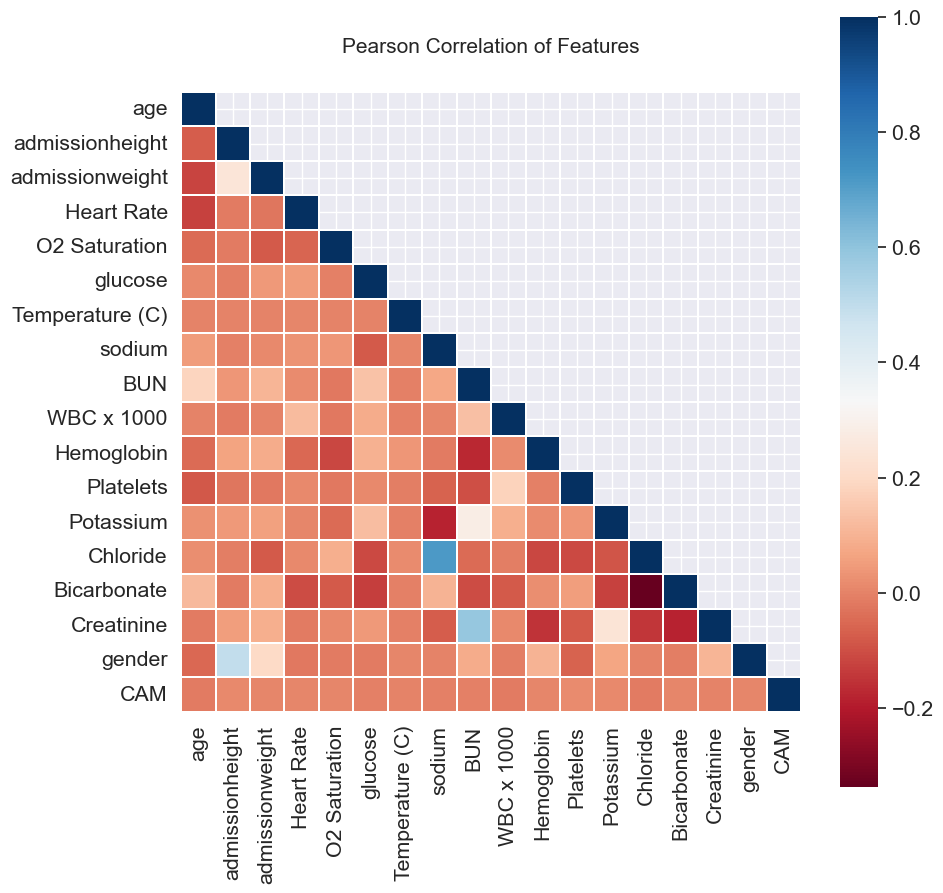

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

colormap = plt.cm.RdBu

mask = np.zeros(new_df[columns_for_corr].corr().shape, dtype=bool)
mask[np.tril_indices(len(mask))] = True
mask = ~mask


plt.figure(figsize=(10,10))

sns.set(font_scale=1.4)
plt.title('Pearson Correlation of Features', y=1.05, size=15)

sns.heatmap(new_df[columns_for_corr].corr(), mask = mask, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)

plt.savefig('eicu_corr_jama.png',dpi=450, facecolor='white', bbox_inches = 'tight',transparent=True)
plt.show()

# Imputation

In [80]:
def check(x):
    try:
        x = float(str(x).strip())
    except:
        x = np.nan
    return x

def check_itemvalue(df):
    for c in df.columns:
        df[c] = df[c].apply(lambda x: check(x))
    return df


In [81]:
new_df.reset_index(inplace=True,drop=True)
new_df.columns

Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'admissionheight', 'admissionweight', 'Heart Rate', 'O2 Saturation',
       'glucose', 'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000',
       'direct bilirubin', 'Hemoglobin', 'Platelets', 'Potassium', 'Chloride',
       'Bicarbonate', 'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'CAM',
       'labelrec', 'labelpt'],
      dtype='object')

In [ ]:
#rename admissionheight and admissionweight
new_df.rename(columns={
    'admissionheight': 'Height',
    'admissionweight': 'Weight'
}, inplace=True)

In [85]:
mean_columns = ['age', 'Height','Weight']

In [86]:
for i in mean_columns:
    new_df[i] = new_df[i].fillna(new_df.groupby("patientunitstayid")[i].transform('mean'))

In [87]:
## Impute with mean of whole cohort
for i in mean_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mean())

In [88]:
new_df.columns

Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'CAM', 'labelrec',
       'labelpt'],
      dtype='object')

# No. of Patients

In [89]:
new_df.shape

(2262356, 27)

In [90]:
new_df.groupby("patientunitstayid").count().shape


(24627, 26)

In [91]:
new_df.groupby("uniquepid").count().shape


(19727, 26)

# Length of Stay (LOS)

## checkpoint 4

## Merging LOS data

In [ ]:
#save new_df
# new_df.to_csv(os.path.join(data_processed_path, 'checkpoint4.csv'), index=False)
#read
# new_df = pd.read_csv(os.path.join(data_processed_path, 'checkpoint4.csv'))

print("shape of new_df:", new_df.shape)
print("number of unique patientunitstayid:", new_df['patientunitstayid'].nunique())
print("number of unique uniquepid:", new_df['uniquepid'].nunique())
print("count of stayid '1009163':", new_df[new_df['patientunitstayid'] == 1009163].shape[0])

shape of new_df: (2262356, 27)
number of unique patientunitstayid: 24627
number of unique uniquepid: 19727
count of stayid '1009163': 37


In [146]:
los = pd.read_csv(os.path.join(eicu_path, 'apachePatientResult.csv'))
los = los[['patientunitstayid','actualiculos']]
los['actualiculos'] = los['actualiculos'] * 24
los.rename(columns={"actualiculos": "LOS"},inplace=True)
new_df_los = pd.merge(new_df, los, how='left', left_on=['patientunitstayid'],right_on=['patientunitstayid'])
print("shape of new_df_los:", new_df_los.shape)
print("number of unique patientunitstayid:", new_df_los['patientunitstayid'].nunique())
print("number of unique uniquepid:", new_df_los['uniquepid'].nunique())
print("count of stayid '1009163':", new_df_los[new_df_los['patientunitstayid'] == 1009163].shape[0])

shape of new_df_los: (4277453, 28)
number of unique patientunitstayid: 24627
number of unique uniquepid: 19727
count of stayid '1009163': 74


In [147]:
new_df_los = new_df_los[new_df_los['LOS']>=24]       
new_df_los = new_df_los[new_df_los['itemoffset'] > 0] #CHANGE TO ZERO
print("before dropping duplicates, shape of new_df_los:", new_df_los.shape)
new_df_los_nodups = new_df_los.drop_duplicates()
print("after dropping duplicates, shape of new_df_los_nodups:", new_df_los_nodups.shape)

before dropping duplicates, shape of new_df_los: (3654606, 28)
after dropping duplicates, shape of new_df_los_nodups: (1827303, 28)


In [148]:
label_deli = new_df_los_nodups.copy()
label_deli['labelrec'] = np.nan
label_deli.loc[label_deli['CAM']==1,'labelrec']=1
label_deli.loc[label_deli['CAM']==0,'labelrec']=0
label_deli['labelpt'] = np.nan
pos_cam_coh = label_deli[label_deli['labelrec']==1]['patientunitstayid'].unique()
label_deli.loc[label_deli['patientunitstayid'].isin(pos_cam_coh), 'labelpt']=1
label_deli.loc[~(label_deli['patientunitstayid'].isin(pos_cam_coh)), 'labelpt']=0
pos_cam_df = label_deli[label_deli['labelpt']==1]
neg_cam_df = label_deli[label_deli['labelpt']==0]
pos_cam_df.reset_index(inplace=True)
pos_cam_df = pos_cam_df.drop(columns=['index'])
neg_cam_df.reset_index(inplace=True)
neg_cam_df = neg_cam_df.drop(columns=['index'])
neg_cam_df['CAM'] = neg_cam_df['labelpt']
pos_cam_df['CAM'] = pos_cam_df['labelpt']
pos_cam_df.to_csv(os.path.join(data_processed_path, 'pos_eicu_notimputed_24los.csv'), index=False)
neg_cam_df.to_csv(os.path.join(data_processed_path, 'neg_eicu_notimputed_24los.csv'), index=False)

## Missing values

### checkpoint 5

In [150]:
# labe deli
label_deli.to_csv(os.path.join(data_processed_path, 'eicu_notimputed_24los.csv'), index=False)
label_deli = pd.read_csv(os.path.join(data_processed_path, 'eicu_notimputed_24los.csv'))

In [151]:
new_df_los_nodups.groupby("patientunitstayid").count().shape

(16546, 27)

In [152]:
new_df_los_nodups.groupby("uniquepid").count().shape

(14228, 27)

In [ ]:
# zero_columns = ['vent_flag', 'rate_dopamine', 'rate_epinephrine', 'rate_norepinephrine',
#        'rate_phenylephrine']
# new_df[zero_columns] = new_df[zero_columns].fillna(value=0)

In [153]:
columns_order = ['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin', 'Hemoglobin',
       'Platelets', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       'ALT', 'AST', 'Alkaline Phosphate', 'CAM', 'labelrec', 'labelpt']

# PATIENT WISE ZERO FILL

df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.drop('patientunitstayid', axis=1).notnull().mean())

for i in df_g.columns:
    df_g[i] = df_g[i].replace({0:np.nan})

    
    #after Imputation

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = df_g.columns
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

C:\Users\URHU\AppData\Local\Temp\ipykernel_33684\628855616.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_g = new_df[columns_order].groupby("patientunitstayid").apply(lambda x: x.drop('patientunitstayid', axis=1).notnull().mean())


,column_name,percent_missing
0,uniquepid,0.000000
1,itemoffset,0.000000
2,gender,0.000000
3,age,0.000000
4,Height,0.000000
5,Weight,0.000000
6,labelpt,0.000000
7,CAM,0.000000
8,Temperature (C),1.628294
9,Heart Rate,4.186462


## Ffill

In [154]:
new_df.columns

Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'CAM', 'labelrec',
       'labelpt'],
      dtype='object')

In [155]:
forward_columns = ['Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 
       # 'sofa', 'sofa_wo_gcs','fluidin', 'fluidout'
       ]

In [156]:
for i in tqdm(forward_columns):
    new_df[i] = new_df.groupby("patientunitstayid")[i].transform(lambda v: v.ffill())

  0%|          | 0/17 [00:00<?, ?it/s]

In [157]:
# PATIENT WISE FORWARD FILL
# To avoid the FutureWarning, exclude the grouping column from the operation:
df_g = new_df[columns_order].groupby("patientunitstayid", group_keys=False).apply(lambda x: x.drop('patientunitstayid', axis=1).notnull().mean())

for i in df_g.columns:
    df_g[i] = df_g[i].replace({0:np.nan})

    
    #after Imputation

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = df_g.columns
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

C:\Users\URHU\AppData\Local\Temp\ipykernel_33684\3349158753.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_g = new_df[columns_order].groupby("patientunitstayid", group_keys=False).apply(lambda x: x.drop('patientunitstayid', axis=1).notnull().mean())


,column_name,percent_missing
0,uniquepid,0.000000
1,itemoffset,0.000000
2,gender,0.000000
3,age,0.000000
4,Height,0.000000
5,Weight,0.000000
6,labelpt,0.000000
7,CAM,0.000000
8,Temperature (C),1.628294
9,Heart Rate,4.186462


## BFill

In [158]:
backward_columns = forward_columns

In [159]:
for i in tqdm(backward_columns):
    new_df[i] = new_df.groupby("patientunitstayid")[i].transform(lambda v: v.bfill())

  0%|          | 0/17 [00:00<?, ?it/s]

In [160]:
new_df.patientunitstayid.nunique(), new_df.shape

(24627, (2262356, 27))

## retake cam

In [ ]:
los = pd.read_csv(os.path.join(eicu_path, 'apachePatientResult.csv'))
los = los[['patientunitstayid','actualiculos']]
los['actualiculos'] = los['actualiculos'] * 24
los.rename(columns={"actualiculos": "LOS"},inplace=True)
new_df_los = pd.merge(new_df, los, how='left', left_on=['patientunitstayid'],right_on=['patientunitstayid'])
new_df_los = new_df_los[new_df_los['LOS']>=24]
new_df_los = new_df_los[new_df_los['itemoffset'] > 0] #CHANGE TO ZERO
new_df_los_nodups = new_df_los.drop_duplicates()
new_df_los_nodups.shape

(1827303, 28)

In [162]:

# MISSING RATE After Filtering on 48 hours
df_g = new_df_los_nodups[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())
for i in df_g.columns:
    df_g[i] = df_g[i].replace({0:np.nan})
    #after Imputation
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = df_g.columns
percent_missing = df_g.isnull().sum() * 100 / len(df_g)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

C:\Users\URHU\AppData\Local\Temp\ipykernel_33684\1713887086.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_g = new_df_los_nodups[columns_order].groupby("patientunitstayid").apply(lambda x: x.notnull().mean())


,column_name,percent_missing
0,patientunitstayid,0.000000
1,uniquepid,0.000000
2,itemoffset,0.000000
3,gender,0.000000
4,age,0.000000
5,Height,0.000000
6,Weight,0.000000
7,labelpt,0.000000
8,CAM,0.000000
9,Temperature (C),0.278013


In [163]:

# MISSING RATE After Filtering on 48 hours


import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
columns = columns_order 
percent_missing = new_df_los_nodups[columns].isnull().sum() * 100 / len(new_df_los_nodups)
missing_value_df = pd.DataFrame({'column_name': columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df.reset_index(inplace=True, drop=True)
missing_value_df

,column_name,percent_missing
0,patientunitstayid,0.000000
1,uniquepid,0.000000
2,itemoffset,0.000000
3,gender,0.000000
4,age,0.000000
5,Height,0.000000
6,Weight,0.000000
7,labelpt,0.000000
8,CAM,0.000000
9,Temperature (C),0.094620


## Drop columns with high missing rate (ALT,AST,Alk Ph, Dir Bil)

In [165]:

print(new_df_los_nodups.patientunitstayid.nunique(), new_df_los_nodups.shape)

new_df_los_nodups.drop(columns=['ALT', 'AST','Alkaline Phosphate','direct bilirubin',
                                # 'fluidin', 'fluidout'
                                ],inplace=True)

print(new_df_los_nodups.patientunitstayid.nunique())

print(new_df_los_nodups.shape)

16546 (1827303, 28)
16546
(1827303, 24)


C:\Users\URHU\AppData\Local\Temp\ipykernel_33684\1192930112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_los_nodups.drop(columns=['ALT', 'AST','Alkaline Phosphate','direct bilirubin',


In [166]:
print(new_df.shape)

(2262356, 27)


### Missing values dropna 

In [167]:
new_df.columns

Index(['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'direct bilirubin',
       'Hemoglobin', 'Platelets', 'Potassium', 'Chloride', 'Bicarbonate',
       'Creatinine', 'ALT', 'AST', 'Alkaline Phosphate', 'CAM', 'labelrec',
       'labelpt'],
      dtype='object')

In [168]:
columns_order = ['patientunitstayid', 'uniquepid', 'itemoffset', 'gender', 'age',
       'Height', 'Weight', 'Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'Hemoglobin', 'Platelets',
       'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine', 
       # 'sofa', 'sofa_wo_gcs', 'vent_flag','rate_dopamine', 'rate_epinephrine', 'rate_norepinephrine', 'rate_phenylephrine',
       'CAM', 'labelrec', 'labelpt', 'LOS']


## Drop patients with missing values

In [169]:
new_df = new_df.dropna(subset=['Heart Rate', 'O2 Saturation', 'glucose',
       'Temperature (C)', 'sodium', 'BUN', 'WBC x 1000', 'Hemoglobin',
       'Platelets', 'Potassium', 'Chloride', 'Bicarbonate', 'Creatinine',
       # 'sofa', 'sofa_wo_gcs', 'vent_flag', 'rate_dopamine', 'rate_epinephrine', 'rate_norepinephrine', 'rate_phenylephrine'
       ])

print("nan in labelrec:", new_df['labelrec'].isna().sum())
print("nan in labelpt:", new_df['labelpt'].isna().sum())
print("unique cam:", new_df['CAM'].unique())

nan in labelrec: 1844453
nan in labelpt: 0
unique cam: [2 0 1]


In [171]:

label_deli = new_df_los_nodups.copy()
label_deli['labelrec'] = np.nan
label_deli.loc[label_deli['CAM']==1,'labelrec']=1
label_deli.loc[label_deli['CAM']==0,'labelrec']=0
label_deli['labelpt'] = np.nan


pos_cam_coh = label_deli[label_deli['labelrec']==1]['patientunitstayid'].unique()
label_deli.loc[label_deli['patientunitstayid'].isin(pos_cam_coh), 'labelpt']=1
label_deli.loc[~(label_deli['patientunitstayid'].isin(pos_cam_coh)), 'labelpt']=0
print("nan in labelpt:", label_deli['labelpt'].isna().sum())
print("nan in labelrec:", label_deli['labelrec'].isna().sum())
print("nan in cam:", label_deli['CAM'].isna().sum())
print("unique cam:", label_deli['CAM'].unique())
print("cam that equals 2:", label_deli[label_deli['CAM'] == 2].shape[0])

pos_cam_df = label_deli[label_deli['labelpt']==1]
neg_cam_df = label_deli[label_deli['labelpt']==0]
pos_cam_df.reset_index(inplace=True)
pos_cam_df = pos_cam_df.drop(columns=['index'])

neg_cam_df.reset_index(inplace=True)
neg_cam_df = neg_cam_df.drop(columns=['index'])

neg_cam_df['CAM'] = neg_cam_df['labelpt']
pos_cam_df['CAM'] = pos_cam_df['labelpt']

pos_cam_df.to_csv(os.path.join(data_processed_path, 'pos_eicu_imputed_24los.csv'), index=False)
neg_cam_df.to_csv(os.path.join(data_processed_path, 'neg_eicu_imputed_24los.csv'), index=False)

nan in labelpt: 0
nan in labelrec: 1710046
nan in cam: 0
unique cam: [2 0 1]
cam that equals 2: 1710046


In [173]:
#merge pos and neg cam df
all_deli = pd.concat([pos_cam_df, neg_cam_df], ignore_index=True)

In [ ]:
#print labelpt == labelrec
print("count of labelpt == labelrec:", (all_deli['labelpt'] == all_deli['labelrec']).sum())

count of labelpt == labelrec: 95233


: 